In [1]:
%load_ext autoreload
%autoreload 2

import IPython
from pathlib import Path
import os
locals = IPython.extract_module_locals() # type: ignore
notebook_name = "/".join(locals[1]["__vsc_ipynb_file__"].split("/"))
os.chdir(Path(notebook_name).parent.parent)

In [2]:
from typing import Callable, Any
from pathlib import Path

import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import random

seed = 0
random.seed(seed)
np.random.seed(seed)

In [3]:
relations = pl.read_parquet(".data/hm/intermediate/full/relations.parquet")
users = pl.read_parquet(".data/hm/intermediate/full/users.parquet")
items = pl.read_parquet(".data/hm/intermediate/full/articles.parquet")

In [4]:
n_users = relations.get_column("customer_id_map").n_unique()
n_items = items.get_column('article_id').n_unique()
relations_n_users = relations.get_column("customer_id").n_unique()
relations_n_items = relations.get_column("article_id").n_unique()

In [5]:
n_users

1362281

In [6]:
u_f = 0.01

relations_filtered = relations.join(relations.select("customer_id_map").unique().sample(fraction=u_f), on="customer_id_map", how="right")
relations_filtered_n_users = relations_filtered.get_column("customer_id").n_unique()
relations_filtered_n_items = relations_filtered.get_column("article_id").n_unique()

In [7]:
print(f"""(Users) Nunique: {n_users}
(Items) Nunique: {n_items}
(Relations, Users) Nunique: {relations_n_users} | diff: {n_users - relations_n_users}
(Relations, Items) Nunique: {relations_n_items} | diff: {n_items - relations_n_items}
(Relations, Users) Nunique (filtered): {relations_filtered_n_users} | diff: {n_users - relations_filtered_n_users}
(Relations, Items) Nunique (filtered): {relations_filtered_n_items} | diff: {n_items - relations_filtered_n_items}""")

(Users) Nunique: 1362281
(Items) Nunique: 105542
(Relations, Users) Nunique: 1362281 | diff: 0
(Relations, Items) Nunique: 104547 | diff: 995
(Relations, Users) Nunique (filtered): 13622 | diff: 1348659
(Relations, Items) Nunique (filtered): 52499 | diff: 53043


(array([2.666e+03, 1.727e+03, 6.330e+02, 1.030e+03, 4.350e+02, 7.220e+02,
        3.030e+02, 5.500e+02, 2.410e+02, 4.050e+02, 1.710e+02, 3.780e+02,
        1.630e+02, 2.490e+02, 1.480e+02, 2.610e+02, 1.130e+02, 1.970e+02,
        9.700e+01, 2.040e+02, 8.100e+01, 1.670e+02, 7.500e+01, 1.350e+02,
        5.700e+01, 1.370e+02, 6.200e+01, 1.200e+02, 4.900e+01, 9.700e+01,
        4.100e+01, 8.400e+01, 4.600e+01, 7.100e+01, 4.600e+01, 8.700e+01,
        6.800e+01, 3.000e+01, 8.900e+01, 3.100e+01, 4.100e+01, 3.600e+01,
        6.600e+01, 2.300e+01, 6.300e+01, 2.200e+01, 5.000e+01, 2.200e+01,
        5.600e+01, 1.500e+01, 2.700e+01, 1.900e+01, 3.800e+01, 1.400e+01,
        3.400e+01, 1.300e+01, 1.600e+01, 1.400e+01, 2.600e+01, 1.400e+01,
        2.100e+01, 1.500e+01, 3.000e+01, 1.300e+01, 3.000e+01, 1.400e+01,
        2.400e+01, 1.300e+01, 2.300e+01, 1.100e+01, 1.400e+01, 1.500e+01,
        1.200e+01, 1.800e+01, 8.000e+00, 2.100e+01, 7.000e+00, 1.700e+01,
        1.000e+01, 1.100e+01, 3.000e+0

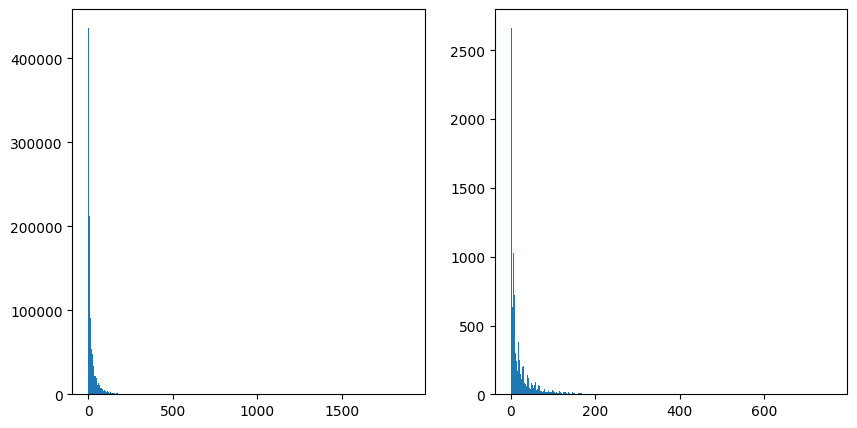

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

relations_cnt = relations.group_by("customer_id_map").agg(pl.len()).sort("len", descending=True)
relations_filtered_cnt = relations_filtered.group_by("customer_id_map").agg(pl.len()).sort("len", descending=True)
ax[0].hist(relations_cnt.select("len"), bins=500)
ax[1].hist(relations_filtered_cnt.select("len"), bins=500)

In [9]:
relations_filtered.write_parquet(".data/hm/intermediate/frac_0_01/relations.parquet")